<a href="https://colab.research.google.com/github/Shritej24c/NLP101/blob/main/HW/HW4/ShritejShrikant_Chavan_HW_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <Font color = 'indianred'>**Load Libraries/Install Software**

In [39]:
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/drive')

    !pip install torchtext --upgrade -qq
    !pip install torchmetrics -qq
    !pip install torchinfo -qq
    !pip install fast_ml -qq
    !pip install joblib -qq
    !pip install sklearn -qq
    !pip install pandas -qq
    !pip install numpy -qq
    !pip install scikit-multilearn -qq
    !pip install transformers evaluate wandb accelerate -U -qq

    basepath = '/content/drive/MyDrive/NLP'

else:
    basepath = '/home/harpreet/Insync/google_drive_shaannoor/data'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 71.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 87.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 111.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 80.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 46.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.1 MB/s

In [133]:
# Importing PyTorch library for tensor computations and neural network modules
import torch
import torch.nn as nn
import torch.nn.functional as F

# For working with textual data vocabularies and for displaying model summaries
from torchtext.vocab import vocab
from torchinfo import summary

# General-purpose Python libraries for random number generation and numerical operations
import random
import numpy as np

# Utilities for efficient serialization/deserialization of Python objects and for element tallying
import joblib
from collections import Counter

# For creating lightweight attribute classes and for partial function application
from types import SimpleNamespace
from functools import partial

# For filesystem path handling, generating and displaying confusion matrices, and date-time manipulations
from pathlib import Path
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from datetime import datetime

# For plotting and visualization
import matplotlib.pyplot as plt

import ast
from sklearn.preprocessing import MultiLabelBinarizer
from fast_ml.model_development import train_valid_test_split
from skmultilearn.model_selection import iterative_train_test_split
import pandas as pd


# For creating lightweight attribute classes and for partial function application
from types import SimpleNamespace
from functools import partial

# Import HammingDistance from torchmetrics
# HammingDistance is useful for evaluating multi-label classification problems.
from torchmetrics import HammingDistance

from torch.nn.utils import clip_grad_value_

from sklearn.metrics import accuracy_score, multilabel_confusion_matrix, classification_report




# <Font color = 'indianred'>**Specify Project Folders**

In [134]:
base_folder = Path(basepath)
data_folder = base_folder/'datasets/hw4'
model_folder = base_folder/'models/nlp_spring_2023/hw4'
custom_functions = base_folder/'custom-functions'

# <Font color = 'indianred'>**Load Dataset**



In [135]:
X_train_cleaned_file = data_folder / 'df_multilabel_hw_cleaned.joblib'

data = joblib.load(X_train_cleaned_file)

In [136]:
type(data)


pandas.core.frame.DataFrame

In [137]:
data.head()


,cleaned_text,Tags,Tag_Number
0,asp query stre dropdown webpage follow control...,c# asp.net,"[0, 9]"
1,run javascript code server java code want run ...,java javascript,"[1, 3]"
2,linq sql throw exception row find change hi li...,c# asp.net,"[0, 9]"
3,run python script php server run nginx web ser...,php python,"[2, 7]"
4,advice write function m try write function res...,javascript jquery,"[3, 5]"


In [138]:
data.shape

(47427, 3)

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47427 entries, 0 to 47426
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   cleaned_text  47427 non-null  object
 1   Tags          47427 non-null  object
 2   Tag_Number    47427 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB


In [140]:
data.describe()


,cleaned_text,Tags,Tag_Number
count,47427,47427,47427
unique,36481,176,176
top,cause error targetcontrolid valid value null...,javascript jquery,"[3, 5]"
freq,3,19989,19989


In [141]:
data.dtypes

cleaned_text    object
Tags            object
Tag_Number      object
dtype: object

In [142]:
data.isna().sum()


cleaned_text    0
Tags            0
Tag_Number      0
dtype: int64

In [143]:
type(data['cleaned_text'][3])

str

In [144]:
arr = []

x = []


for i in range(data.shape[0]):
    arr.append(ast.literal_eval(data['Tag_Number'][i]))
    x.append(str(data['cleaned_text'][i]))



x = np.array(x).reshape(-1,1)



In [145]:
x[1]

array(['run javascript code server java code want run javascript code server want manipulate result return javascript inside java code'],
      dtype='<U30141')

In [146]:
mlb = MultiLabelBinarizer()

y = mlb.fit_transform(arr)

print(type(y) , y.shape)
print(type(x) , x.shape)




<class 'numpy.ndarray'> (47427, 10)
<class 'numpy.ndarray'> (47427, 1)


# <Font color = 'indianred'>**Data Split**

iterative-stratification
iterative-stratification is a project that provides scikit-learn compatible cross validators with stratification for multilabel data.

Presently scikit-learn provides several cross validators with stratification. However, these cross validators do not offer the ability to stratify multilabel data. This iterative-stratification project offers implementations of MultilabelStratifiedKFold, MultilabelRepeatedStratifiedKFold, and MultilabelStratifiedShuffleSplit with a base algorithm for stratifying multilabel data described in the following paper:

Sechidis K., Tsoumakas G., Vlahavas I. (2011) On the Stratification of Multi-Label Data. In: Gunopulos D., Hofmann T., Malerba D., Vazirgiannis M. (eds) Machine Learning and Knowledge Discovery in Databases. ECML PKDD 2011. Lecture Notes in Computer Science, vol 6913. Springer, Berlin, Heidelberg.

In [147]:
X_train, y_train, X_test, y_test = iterative_train_test_split(X = x, y = y , test_size = 0.4)

X_valid, y_valid, X_test, y_test = iterative_train_test_split(X_test, y_test , test_size = 0.5)


# X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(data['cleaned_text'], y ,
#                                                                             train_size=0.6, valid_size=0.2, test_size=0.2, random_state=42,
#                                                                             shuffle=True, stratify=y)


# <Font color = 'indianred'>**Custom Dataset Class**

In [148]:
class CustomDataset(torch.utils.data.Dataset):
    """
    Custom Dataset class for loading IMDB reviews and labels.

    Attributes:
        X (numpy.ndarray): Feature data, an array of texts.
        y (list or array-like): Target labels.
    """

    def __init__(self, X, y):
        """
        Initialize the dataset with feature and target data.

        Args:
            X (list or array-like): The feature data (texts).
            y (list or array-like): The target labels.
        """
        # Converting the feature data to a NumPy array for consistency
        self.X = np.array(X)

        # Storing the target labels
        self.y = y

    def __len__(self):
        """
        Return the number of samples in the dataset.

        Returns:
            int: The total number of samples.
        """
        return len(self.X)

    def __getitem__(self, idx):
        """
        Fetch and return a single sample from the dataset at the given index.

        Args:
            idx (int): Index of the sample to fetch.

        Returns:
            tuple: A tuple containing the label and the text for the sample.
        """
        # Retrieve the text and corresponding label from the dataset using the index
        texts = self.X[idx][0]
        labels = self.y[idx]

        # Packing them into a tuple before returning
        sample = (labels, texts)

        return sample


In [149]:
trainset = CustomDataset(X_train, y_train)
validset = CustomDataset(X_valid, y_valid)
testset = CustomDataset(X_test, y_test)

In [150]:
trainset[3][1]

'php page redirect operation page php grid subpages(<<1,2,3,4 > > operation page take $ get[\'prd_p $ request[\'prd_p give page number want user stay page operation mean use redirect   < form name="frmsearchme action="<?php echo $ page_name > method="post > < tr >   < input class=\'form_button type=\'submit name=\'btnsubmit value= save onclick=\'return checkerrors /></td >   < /tr > //php code < /form >  '

## <Font color = 'indianred'>**Create Vocab**

In [151]:
def get_vocab(dataset, min_freq=1):
    """
    Generate a vocabulary from a dataset.

    Args:
        dataset (list of tuple): List of tuples where each tuple contains a label and a text.
        min_freq (int): The minimum frequency for a token to be included in the vocabulary.

    Returns:
        torchtext.vocab.Vocab: Vocabulary object.
    """
    # Initialize a counter object to hold token frequencies
    counter = Counter()

    # Update the counter with tokens from each text in the dataset
    for (l_, text) in dataset:
        counter.update(str(text).split())

    # Create a vocabulary using the counter object
    # Tokens that appear fewer times than `min_freq` are excluded
    my_vocab = vocab(counter, min_freq=min_freq)

    # Insert a '<unk>' token at index 0 to represent unknown words
    my_vocab.insert_token('<unk>', 0)

    # Set the default index to 0
    # This ensures that any unknown word will be mapped to '<unk>'
    my_vocab.set_default_index(0)

    return my_vocab


In [152]:
lang_vocab = get_vocab(trainset, min_freq=2)

In [153]:
len(lang_vocab)

90146

In [154]:
lang_vocab.get_itos()[0:5]

['<unk>', 'asp', 'query', 'stre', 'dropdown']

## <Font color = 'indianred'>**Collate_fn for Data Loaders**

In [155]:

# Creating a function that will be used to get the indices of words from vocab
def text_pipeline(x, vocab):
    """Converts text to a list of indices using a vocabulary dictionary"""
    return [vocab[token] for token in str(x).split()]

In [156]:
def collate_batch(batch, my_vocab):
    """
    Collates a batch of samples into tensors of labels, texts, and offsets.

    Parameters:
        batch (list): A list of tuples, each containing a label and a text.

    Returns:
        tuple: A tuple containing three tensors:
               - Labels tensor
               - Concatenated texts tensor
               - Offsets tensor indicating the start positions of each text in the concatenated tensor
    """
    # Unpack the batch into separate lists for labels and texts
    labels, texts = zip(*batch)

    # Convert the list of labels into a tensor of dtype int32
    labels = torch.tensor(labels, dtype=torch.float32)

    # Convert the list of texts into a list of lists; each inner list contains the vocabulary indices for a text
    list_of_list_of_indices = [text_pipeline(text, my_vocab) for text in texts]

    # Compute the offsets for each text in the concatenated tensor
    offsets = [0] + [len(i) for i in list_of_list_of_indices]
    offsets = torch.tensor(offsets[:-1]).cumsum(dim=0)

    # Concatenate all text indices into a single tensor
    texts = torch.cat([torch.tensor(i, dtype=torch.int64) for i in list_of_list_of_indices])

    return (texts, offsets), labels

## <Font color = 'indianred'>**Check Data Loaders**

Let us check if our collate function is working by creating a dataloader

In [157]:
batch_size = 2
check_loader = torch.utils.data.DataLoader(dataset=trainset,
                                           batch_size=batch_size,
                                           shuffle=True,
                                           collate_fn=partial(collate_batch, my_vocab = lang_vocab),
                                           )

In [158]:
torch.manual_seed(22)
for (text, offset), label in check_loader:
    print(text, offset, label)
    break


tensor([  158,   100,   494,   123,   915,   949,    60,  1098,  2381,    53,
            6,   100,   301,    29,   495,    34,    29,   682,  3798,    34,
           29,   450,     0,    34,    29,   450, 60285,    34,    29,  2340,
           34,    29,   682,  3798,    34,    29,   450,     0,    34,    29,
          450,     0,    34,    29,  2340,    34,    29,   682,  3798,    34,
           29,   450,     0,    34,    29,   450,     0,    34,    29,  2340,
           34,    29,   682,  3798,    34,    29,   450,     0,    34,    29,
          450, 60285,    34,    29,  2340,    34,    29,   685,    34,    19,
          682,   123,   915,  3495,  1098,    53,   230,    26,   235,  8413,
           50,   486,    47,   873,   388,   542,   826,   102,   388,   858,
          259,  9392,  2746,   542,   388,   542,  1565,   388,   858,  1172,
         8902,  3127,  1524,   387,     0, 35886,   387,   594,     0,   496,
          570,  1109,    51,     0, 35886,   704,  1565,   858, 

# <Font color = 'indianred'>**Model**
embedding_layer-->linear--> ReLU -->dropout --> batch norm --> linear-->ReLu-->Dropout--> batchnorm ---> linear layer

In [159]:
from transformers.modeling_outputs import SequenceClassifierOutput
from transformers import PreTrainedModel, PretrainedConfig
import torch
import torch.nn as nn

In [160]:
class CustomConfig(PretrainedConfig):
  def __init__(self, vocab_size=0, embedding_dim=0, hidden_dim1=0, hidden_dim2=0, num_labels=0, **kwargs):
      super().__init__()
      self.vocab_size = vocab_size
      self.embedding_dim = embedding_dim
      self.hidden_dim1 = hidden_dim1
      self.hidden_dim2 = hidden_dim2
      self.num_labels = num_labels

In [161]:
class CustomMLP(PreTrainedModel):
    # config_class = CustomConfig

    def __init__(self, config):
        super().__init__(config)

        self.embedding_bag = nn.EmbeddingBag(config.vocab_size, config.embedding_dim)
        self.layers = nn.Sequential(
            nn.Linear(config.embedding_dim, config.hidden_dim1),
            nn.BatchNorm1d(num_features=config.hidden_dim1),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(config.hidden_dim1, config.hidden_dim2),
            nn.BatchNorm1d(num_features=config.hidden_dim2),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(config.hidden_dim2, config.num_labels)
        )

    def forward(self, input_ids, offsets, labels=None):
        embed_out = self.embedding_bag(input_ids, offsets)
        logits = self.layers(embed_out)

        loss = None
        if labels is not None:
            loss_fct = nn.BCEWithoutLogitsLoss()
            loss = loss_fct(logits.view(-1, self.config.num_labels), labels.view(-1))

        return SequenceClassifierOutput(
            loss=loss,
            logits=logits
        )


# <Font color = 'indianred'>**Hyperparameters**

In [162]:
hyperparameters = SimpleNamespace(
    # model Parameters
    EMBED_DIM=300,
    VOCAB_SIZE=len(lang_vocab),
    OUTPUT_DIM=10,
    HIDDEN_DIM1=200,
    HIDDEN_DIM2=100,

    # training
    EPOCHS=5,
    BATCH_SIZE=128,
    LEARNING_RATE=0.001,
    WEIGHT_DECAY=0.0001,
    CLIP_TYPE='value',
    CLIP_VALUE=10,
    PATIENCE=5,

    # data
)

collate_fn = partial(collate_batch, my_vocab=lang_vocab)

In [163]:
class CustomBlock(nn.Module):
    def __init__(self, input_dim, output_dim, drop_prob):

        super().__init__()

        self.layers = nn.Sequential(
            nn.Linear(input_dim, output_dim),
            nn.BatchNorm1d(num_features=output_dim),
            nn.ReLU(),
            nn.Dropout(p=drop_prob),

        )
    def forward(self, x):
      return self.layers(x)


In [164]:
class EmbeddingBagWrapper(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super().__init__()
        self.embedding_bag = nn.EmbeddingBag(vocab_size, embedding_dim)

    def forward(self, input_tuple):
        data, offsets = input_tuple
        return self.embedding_bag(data, offsets)

# Define the sequential model
vocab_size = len(lang_vocab)
embed_dim = hyperparameters.EMBED_DIM
model_embedding_1 = nn.Sequential(
    EmbeddingBagWrapper(vocab_size, embed_dim ),
    CustomBlock(embed_dim , hyperparameters.HIDDEN_DIM1, 0.5),
    CustomBlock(hyperparameters.HIDDEN_DIM1, hyperparameters.HIDDEN_DIM2, 0.5),
    nn.Linear(hyperparameters.HIDDEN_DIM2, hyperparameters.OUTPUT_DIM)
    )


In [165]:
# Define the device
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Move the model to the device
model_embedding_1 = model_embedding_1.to(device)

# Generate some dummy input data and offsets, and move them to the device
data = torch.LongTensor([1, 2, 4, 5, 4]).to(device)
offsets = torch.LongTensor([0, 2, 4]).to(device)

# Generate summary
summary(model_embedding_1, input_data=[(data, offsets)], device=device)


Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [3, 10]                   --
├─EmbeddingBagWrapper: 1-1               [3, 300]                  --
│    └─EmbeddingBag: 2-1                 [3, 300]                  27,043,800
├─CustomBlock: 1-2                       [3, 200]                  --
│    └─Sequential: 2-2                   [3, 200]                  --
│    │    └─Linear: 3-1                  [3, 200]                  60,200
│    │    └─BatchNorm1d: 3-2             [3, 200]                  400
│    │    └─ReLU: 3-3                    [3, 200]                  --
│    │    └─Dropout: 3-4                 [3, 200]                  --
├─CustomBlock: 1-3                       [3, 100]                  --
│    └─Sequential: 2-3                   [3, 100]                  --
│    │    └─Linear: 3-5                  [3, 100]                  20,100
│    │    └─BatchNorm1d: 3-6             [3, 100]                  2

In [166]:
# Test the model
# Move the model to the device
model_embedding_1 = model_embedding_1.to(device)

# Generate some dummy input data and offsets, and move them to the device
# we will pass text as input, collate function will create data and offsets
data = torch.LongTensor([1, 2, 4, 5, 4]).to(device)
offsets = torch.LongTensor([0, 2, 4]).to(device)

# Since nn.Sequential expects a single input, we pack data and offsets into a tuple
output = model_embedding_1((data, offsets))

print(output)


tensor([[ 1.0477, -0.3162, -1.4045, -0.2548, -0.9364, -0.3623, -0.2632, -0.2217,
         -0.3958,  0.9847],
        [ 0.5110,  0.2843,  0.4339, -0.7888,  0.2140,  0.1882,  0.2605,  0.0651,
         -0.4568,  0.4220],
        [-0.0763,  1.2264, -0.7943, -0.1306,  1.3449,  0.7397, -0.8203, -2.4401,
          0.0569, -0.0226]], device='cuda:0', grad_fn=<AddmmBackward0>)


## <Font color = 'indianred'>**Step Function**

In [168]:
def step(inputs, targets, model, device, loss_function=None, optimizer=None):
    """
    Performs a forward and backward pass for a given batch of inputs and targets.

    Parameters:
    - inputs (torch.Tensor): The input data for the model.
    - targets (torch.Tensor): The true labels for the input data.
    - model (torch.nn.Module): The neural network model.
    - device (torch.device): The computing device (CPU or GPU).
    - loss_function (torch.nn.Module, optional): The loss function to use.
    - optimizer (torch.optim.Optimizer, optional): The optimizer to update model parameters.

    Returns:
    - loss (float): The computed loss value (only if loss_function is not None).
    - outputs (torch.Tensor): The predictions from the model.
    - correct (int): The number of correctly classified samples in the batch.
    """
    # Move the model and data to the device

    train_hamming_distance = HammingDistance(task="multilabel", num_labels=10).to(device)

    model = model.to(device)
    inputs = tuple(input_tensor.to(device)
                            for input_tensor in inputs)

    targets = targets.to(device)

    # Step 1: Forward pass to get the model's predictions
    outputs = model(inputs)

    # Step 2: Compute the loss using the provided loss function
    if loss_function:
        loss = loss_function(outputs, targets)

    with torch.no_grad():
        # Correct prediction using thresholding
        y_pred = (outputs.data>0.5).float()

        # Update Hamming Distance metric
        train_hamming_distance.update(y_pred, targets)


    # Step 3 and 4: Perform backward pass and update model parameters if an optimizer is provided
    if optimizer:
        optimizer.zero_grad()
        loss.backward()
        clip_grad_value_(model.parameters(), clip_value = hyperparameters.CLIP_VALUE)
        optimizer.step()

    # Return relevant metrics
    if loss_function:
        return loss, outputs, train_hamming_distance
    else:
        return outputs, train_hamming_distance


## <Font color = 'indianred'>**Train_Epoch Function**

In [169]:
def train_epoch(train_loader, model, device, loss_function, optimizer):
    """
    Trains the model for one epoch using the provided data loader and updates the model parameters.

    Parameters:
    - train_loader (torch.utils.data.DataLoader): DataLoader object for the training set.
    - model (torch.nn.Module): The neural network model to be trained.
    - device (torch.device): The computing device (CPU or GPU).
    - loss_function (torch.nn.Module): The loss function to use for training.
    - optimizer (torch.optim.Optimizer): The optimizer to update model parameters.

    Returns:
    - train_loss (float): Average training loss for the epoch.
    - train_acc (float): Training accuracy for the epoch.
    """
    # Set the model to training mode




    model.train()

    # Initialize variables to track running training loss and correct predictions
    running_train_loss = 0.0
    running_train_correct = 0

    # Iterate over all batches in the training data
    for inputs, targets in train_loader:
        # Perform a forward and backward pass, updating model parameters
        loss, _, hamming = step(inputs, targets, model, device, loss_function, optimizer)

        # Update running loss and correct predictions counter
        running_train_loss += loss.item()

        # Compute Hamming Distance for the epoch
        epoch_hamming_distance = hamming.compute()

    # Compute average loss and accuracy for the entire training set
    train_loss = running_train_loss / len(train_loader)

    return train_loss, epoch_hamming_distance


## <Font color = 'indianred'>**Val_Epoch Function**

In [170]:
def val_epoch(valid_loader, model, device, loss_function):
    """
    Validates the model for one epoch using the provided data loader.

    Parameters:
    - valid_loader (torch.utils.data.DataLoader): DataLoader object for the validation set.
    - model (torch.nn.Module): The neural network model to be validated.
    - device (torch.device): The computing device (CPU or GPU).
    - loss_function (torch.nn.Module): The loss function to evaluate the model.

    Returns:
    - val_loss (float): Average validation loss for the epoch.
    - val_acc (float): Validation accuracy for the epoch.
    """
    # Set the model to evaluation mode
    model.eval()

    # Initialize variables to track running validation loss and correct predictions
    running_val_loss = 0.0
    running_val_correct = 0

    # Disable gradient computation
    with torch.no_grad():
        # Iterate over all batches in the validation data
        for inputs, targets in valid_loader:
            # Perform a forward pass to get loss and number of correct predictions
            loss, _, hamming = step(inputs, targets, model, device, loss_function, optimizer=None)

            # Update running loss and correct predictions counter
            running_val_loss += loss.item()
            # Compute Hamming Distance for the epoch
            epoch_hamming_distance = hamming.compute()


    # Compute average loss and accuracy for the entire validation set
    val_loss = running_val_loss / len(valid_loader)
    #val_acc = running_val_correct / len(valid_loader.dataset)

    return val_loss, epoch_hamming_distance


In [171]:
def train(train_loader, valid_loader, model, optimizer, loss_function, epochs, device):
    """
    Trains and validates the model, and returns history of train and validation metrics.

    Parameters:
    - train_loader (torch.utils.data.DataLoader): DataLoader for the training set.
    - valid_loader (torch.utils.data.DataLoader): DataLoader for the validation set.
    - model (torch.nn.Module): Neural network model to train.
    - optimizer (torch.optim.Optimizer): Optimizer algorithm.
    - loss_function (torch.nn.Module): Loss function to evaluate the model.
    - epochs (int): Number of epochs to train the model.
    - device (torch.device): The computing device (CPU or GPU).

    Returns:
    - train_loss_history (list): History of training loss for each epoch.
    - train_acc_history (list): History of training accuracy for each epoch.
    - valid_loss_history (list): History of validation loss for each epoch.
    - valid_acc_history (list): History of validation accuracy for each epoch.
    """

    # Initialize lists to store metrics for each epoch
    train_loss_history = []
    valid_loss_history = []
    train_hamm_history = []
    valid_hamm_history = []

    # Loop over the number of specified epochs
    for epoch in range(epochs):
        # Train model on training data and capture metrics
        train_loss, train_hamm = train_epoch(
            train_loader, model, device, loss_function, optimizer)

        # Validate model on validation data and capture metrics
        valid_loss, valid_hamm = val_epoch(
            valid_loader, model, device, loss_function)

        # Store metrics for this epoch
        train_loss_history.append(train_loss)
        train_hamm_history.append(train_hamm.to('cpu').numpy())
        valid_loss_history.append(valid_loss)
        valid_hamm_history.append(valid_hamm.to('cpu').numpy())

        # Output epoch-level summary
        print(f"Epoch {epoch+1}/{epochs}")
        print(f"Train Loss: {train_loss:.4f} | Train Hamming Distance: {train_hamm:.4f}")
        print(f"Valid Loss: {valid_loss:.4f} | Valid Hamming Distance: {valid_hamm:.4f}")
        print()

    return train_loss_history, train_hamm_history, valid_loss_history, valid_hamm_history


# <Font color = 'indianred'>**Training Configuration**

In [172]:
# Fix seed value
SEED = 2345
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

collate_fn = partial(collate_batch, my_vocab=lang_vocab)

# Data Loader
train_loader = torch.utils.data.DataLoader(trainset, batch_size=hyperparameters.BATCH_SIZE, shuffle=True,
                                           collate_fn=collate_fn, num_workers=4)
valid_loader = torch.utils.data.DataLoader(validset, batch_size=hyperparameters.BATCH_SIZE, shuffle=False,
                                           collate_fn=collate_fn,  num_workers=4)
test_loader = torch.utils.data.DataLoader(testset, batch_size=hyperparameters.BATCH_SIZE,   shuffle=False,
                                          collate_fn=collate_fn,  num_workers=4)

# cross entropy loss function
loss_function = nn.BCEWithLogitsLoss()


# model
model_lang = nn.Sequential(
    EmbeddingBagWrapper(vocab_size, embed_dim ),
    CustomBlock(embed_dim , hyperparameters.HIDDEN_DIM1, 0.5),
    CustomBlock(hyperparameters.HIDDEN_DIM1, hyperparameters.HIDDEN_DIM2, 0.5),
    nn.Linear(hyperparameters.HIDDEN_DIM2, hyperparameters.OUTPUT_DIM)
    )


def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.kaiming_normal_(m.weight)
        torch.nn.init.zeros_(m.bias)


# apply initialization recursively  to all modules
model_lang.apply(init_weights)

# Intialize stochiastic gradient descent optimizer
optimizer = torch.optim.AdamW(model_lang.parameters(),
                             lr=hyperparameters.LEARNING_RATE,

                             )

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# <Font color = 'indianred'>**Sanity Check**
- Check the loss without any training. For Cross entropy the expected value will be log(number of classes)

In [173]:
batch_size = 2
check_loader = torch.utils.data.DataLoader(dataset=trainset,
                                           batch_size=batch_size,
                                           shuffle=True,
                                           collate_fn=partial(collate_batch, my_vocab = lang_vocab),
                                           )



In [174]:
for input_ , targets  in train_loader:

    # move inputs and outputs to GPUs
    model_lang = model_lang.to(device)

    input_ = tuple(input_tensor.to(device)
                            for input_tensor in input_)
    targets = targets.to(device)

    model_lang.eval()
    # Forward pass
    output = model_lang(input_)
    loss = loss_function(output, targets)
    print(f'Actual loss: {loss}')
    break

print(f'Expected Theoretical loss: {np.log(2)}')

Actual loss: 0.6807318925857544
Expected Theoretical loss: 0.6931471805599453


# <Font color = 'indianred'>**Training Model**

In [175]:
# Call the train function to train the model
train_losses, train_hamm, valid_losses, valid_hamm = train(
    train_loader, valid_loader, model_lang
    , optimizer, loss_function, hyperparameters.EPOCHS, device
)

Epoch 1/5
Train Loss: 0.3519 | Train Hamming Distance: 0.0636
Valid Loss: 0.1972 | Valid Hamming Distance: 0.1973

Epoch 2/5
Train Loss: 0.1908 | Train Hamming Distance: 0.0750
Valid Loss: 0.1572 | Valid Hamming Distance: 0.2000

Epoch 3/5
Train Loss: 0.1556 | Train Hamming Distance: 0.0568
Valid Loss: 0.1364 | Valid Hamming Distance: 0.1757

Epoch 4/5
Train Loss: 0.1345 | Train Hamming Distance: 0.0545
Valid Loss: 0.1254 | Valid Hamming Distance: 0.1595

Epoch 5/5
Train Loss: 0.1194 | Train Hamming Distance: 0.0295
Valid Loss: 0.1166 | Valid Hamming Distance: 0.1486



# <Font color = 'indianred'>**Plot Losses Metrics**


In [176]:
def plot_history(train_losses, train_metrics, val_losses=None, val_metrics=None):
    """
    Plot training and validation loss and metrics over epochs.

    Args:
        train_losses (list): List of training losses for each epoch.
        train_metrics (list): List of training metrics (e.g., accuracy) for each epoch.
        val_losses (list, optional): List of validation losses for each epoch.
        val_metrics (list, optional): List of validation metrics for each epoch.

    Returns:
        None
    """
    epochs = range(1, len(train_losses) + 1)

    # Plot training and validation losses
    plt.figure()
    plt.plot(epochs, train_losses, label="Train")
    if val_losses:
        plt.plot(epochs, val_losses, label="Validation")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    # Plot training and validation metrics (if available)
    if train_metrics[0] is not None:
        plt.figure()
        plt.plot(epochs, train_metrics, label="Train")
        if val_metrics:
            plt.plot(epochs, val_metrics, label="Validation")
        plt.xlabel("Epochs")
        plt.ylabel("Hamming Distance")
        plt.legend()
        plt.show()


In [177]:
train_hamm

[array(0.06363636, dtype=float32),
 array(0.07499999, dtype=float32),
 array(0.05681819, dtype=float32),
 array(0.05454546, dtype=float32),
 array(0.02954543, dtype=float32)]

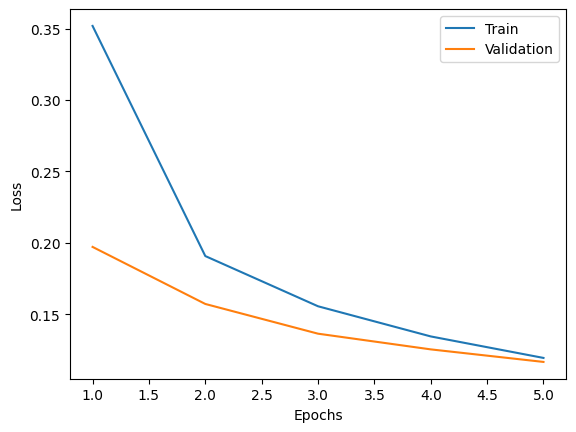

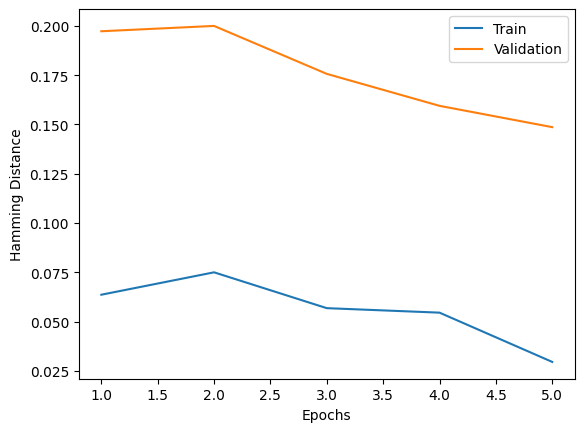

In [178]:
plot_history(train_losses, train_hamm, valid_losses, valid_hamm)

# <Font color = 'indianred'>**Model Checkpointing**

In [179]:
# Get the current timestamp in the format "YYYY-MM-DD_HH-MM-SS"
timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

# Define a suffix for the file name
suffix = 'hw4'

# Combine the timestamp and suffix to create the file path
path = model_folder / f'{timestamp}_{suffix}.pt'
path

PosixPath('/content/drive/MyDrive/NLP/models/nlp_spring_2023/hw4/2023-09-25_01-43-13_hw4.pt')

In [180]:
# Save the model's state dictionary to the specified file path
torch.save(model_lang.state_dict(), path)


In [181]:

# model
my_model = nn.Sequential(
    EmbeddingBagWrapper(vocab_size, embed_dim ),
    CustomBlock(embed_dim , hyperparameters.HIDDEN_DIM1, 0.5),
    CustomBlock(hyperparameters.HIDDEN_DIM1, hyperparameters.HIDDEN_DIM2, 0.5),
    nn.Linear(hyperparameters.HIDDEN_DIM2, hyperparameters.OUTPUT_DIM)
    )


# Load the model's state dictionary from the specified checkpoint file
checkpoint = torch.load(path)

# Load the saved state dictionary into the model
my_model.load_state_dict(checkpoint)

<All keys matched successfully>

# <Font color = 'indianred'>**Get Accuracy, Predictions**

In [182]:
def get_acc_pred(data_loader, model, device):
    """
    Function to get predictions and accuracy for a given data using a trained model
    Input: data iterator, model, device
    Output: predictions and accuracy for the given dataset
    """
    model = model.to(device)
    # Set model to evaluation mode
    model.eval()

    # Create empty tensors to store predictions and actual labels
    predictions = torch.Tensor().to(device)
    y = torch.Tensor().to(device)

    # Iterate over batches from data iterator
    with torch.no_grad():
        for inputs, targets in data_loader:
            # Process the batch to get the loss, outputs, and correct predictions
            outputs, _ = step(inputs, targets, model,
                              device, loss_function=None, optimizer=None)

            # Choose the label with maximum probability
            # Correct prediction using thresholding
            y_pred = (outputs.data>0.5).float()

            # Add the predicted labels and actual labels to their respective tensors
            predictions = torch.cat((predictions, y_pred))
            y = torch.cat((y, targets.to(device)))

    # Calculate accuracy by comparing the predicted and actual labels
    accuracy = (predictions == y).float().mean()

    # Return tuple containing predictions and accuracy
    return predictions, accuracy, y

In [183]:
# Get the prediction and accuracy
predictions_test, acc_test, y_test = get_acc_pred(test_loader, my_model, device)
predictions_train, acc_train, y_train = get_acc_pred(train_loader, my_model, device)
predictions_valid, acc_valid, y_valid = get_acc_pred(valid_loader, my_model, device)

In [184]:
# Print Test Accuracy
print('Test accuracy', acc_test * 100)
print('Train accuracy', acc_train * 100)
print('Valid accuracy', acc_valid * 100)

Test accuracy tensor(95.7285, device='cuda:0')
Train accuracy tensor(96.7632, device='cuda:0')
Valid accuracy tensor(95.6536, device='cuda:0')


# <Font color = 'indianred'>**Get Multi-Label Confusion Matrix**

In [185]:
multilabel_confusion_matrix(y_true=y_test.cpu(), y_pred=predictions_test.cpu())

array([[[7182,  186],
        [ 418, 1672]],

       [[7691,  114],
        [ 173, 1480]],

       [[8257,   52],
        [ 473,  676]],

       [[3588,  399],
        [ 467, 5004]],

       [[7856,   74],
        [ 139, 1389]],

       [[4246,  234],
        [ 415, 4563]],

       [[9295,    8],
        [  98,   57]],

       [[9335,    2],
        [  98,   23]],

       [[9396,    0],
        [  62,    0]],

       [[6811,  154],
        [ 474, 2019]]])

# <Font color = 'indianred'>**Get Test Data Hamming Distance**

In [196]:
test_hamming_distance = HammingDistance(task="multilabel", num_labels=10).to(device)
test_hamming_distance.update(y_test, predictions_test)


In [197]:
test_hamming_distance.compute()

tensor(0.0427, device='cuda:0')